# Task-1 [Theoretical]

## Q.1.a.
Ans.1.a:

  $$
    J_0(w) =-logp({x_n,t_n):n=1,2,...};w)
  $$ 
  $$ 
    =-log\underset{n}{\prod}\underset{m=0}{\prod}^{9}p(t_n=m|x_n;w)
  $$


  First i'll define few concepts:

  1) **softmax function**:  It's a generalization of logistic function but for multiple class (in place of binary classes).  Softmax is given by:
  $$ \sigma(\mathbf{z})_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{K} e^{z_{j}}} \text { for } i=1, \ldots, K \text { and } \mathbf{z}=\left(z_{1}, \ldots, z_{K}\right) \in \mathbb{R}^{K} $$
  
  Softmax distributes the probabilty of 1 among different k-classes.  Hence, it tries to convey the amount of confidence in each class.


For next part we'll introduce the idea of Negative log likelihood.
Now as in common Machine learning algorithms, we use the idea that product of probabilities of 'N' terms can be converted into its '**log**' to simplify the product into summation of same 'N' terms. This conversion into '**Log**' form is very crucial as:

  i) It's easly differentiable now, which can help us to find the maxima & minima.

  ii) It's more simpler in calculation.

  iii) We also convert the 'log' into 'Negative log', so the objective of maximizing the probabilty is converted into a minimization problem.


Negative Log-likelihood (NNL) is given by:
  $$ L(y) = - log(A) $$ 
Where A is likelihood function.


Thus we tend to use Negative Log-likelihood in combination with softmax. As softmax helps us to deal with muticlass probability & NNL helps to get minima.

Thus the Criterion function of NN becomes:
  $$ L(y) = - log(\sigma(\mathbf{z})_{i}) $$

Now as mentioned earlier, we'll differentiate this w.r.t to Forward propagation (for k'th epoch). Hence:

$$\frac{\partial L_{i}}{\partial f_{k}} = \frac{\partial L_{i}}{\partial \sigma(\mathbf{z})_{k}} \frac{\partial \sigma(\mathbf{z})_{k}}{\partial f_{k}}$$


On further simplifying the derivative, we'll get:
  $$ \frac{\partial L_{i}}{\partial f_{k}} = \sigma(\mathbf{z})_{k}(1 - \sigma(\mathbf{z})_{k}) $$

However, given a training set, we can get Error function:

$$ E(\mathbf{w})=\frac{1}{2} \sum_{n=1}^{N}\left\{y\left(\mathbf{x}_{n}, \mathbf{w}\right)-t_{n}\right\}^{2} $$


We know that our motive is to minimze the error function in general for the given data set.

As one can sense that we have to minimize both NNL & Error function. But both tackle different minimization. Error Function deals with error between the labeled data & predictions. On other hand, NNL tries to optimize the prediction function producing those predictions. For the given training set with k classes, above differentiated NNL will become:

  $$ p(t \mid \mathbf{x}, \mathbf{w})=\underset{k=1}{\prod}^{K}y(\mathbf{x}, \mathbf{w})^{t_k}\{1-y(\mathbf{x}, \mathbf{w})\}^{1-t_k} $$

Thus we combine Error function & new NNL, to get:

  $$ E(\mathbf{w})=-\sum_{n=1}^{N} \sum_{k=1}^{K}\left\{t_{n k} \ln y_{n k}+\left(1-t_{n k}\right) \ln \left(1-y_{n k}\right)\right\} $$

Hence, a neural network to maximize the log likelihood of label is one that has
softmax output nodes and minimizes the criterion function of the negative log probability of training data set.






___

## Q.1.b
Ans.1.b

For the given data with the distribution given by:
  $$ p(t \mid \mathbf{x}, \mathbf{w}, \beta)=\mathcal{N}\left(t \mid y(\mathbf{x}, \mathbf{w}), \beta^{-1}\right) $$

  We can also choose a Gaussian distribution of the weights(w), given by:

   $$ p(\mathbf{w} \mid \alpha)=\mathcal{N}\left(\mathbf{w} \mid 0, \alpha^{-1}I\right) $$

Thus, for the given data with 'N' observations, likelihood function is given by:

  $$ p(D \mid \mathbf{w}, \beta)=\underset{n=1}{\prod}^{N}\mathcal{N}\left(t_n \mid y(\mathbf{x_n}, \mathbf{w}), \beta^{-1}\right) $$

Thus the posterior distribution will be:

  $$ p(\mathbf{w} \mid D, \alpha, \beta) \propto p(\mathbf{w} \mid \alpha) p(D \mid \mathbf{w}, \beta) $$


We can find a Gaussian approximation to the posterior distribution by using the
Laplace approximation. To do this, we must first find a (local) maximum of the
posterior, and this must be done using iterative numerical optimization. As usual, it is convenient to maximize the logarithm of the posterior, which can be written in the form:

  $$ \ln p(\mathbf{w} \mid \mathcal{D})=-\frac{\alpha}{2} \mathbf{w}^{\mathrm{T}} \mathbf{w}-\frac{\beta}{2} \sum_{n=1}^{N}\left\{y\left(\mathbf{x}_{n}, \mathbf{w}\right)-t_{n}\right\}^{2}+\mathrm{const} $$

Hence, a neural network to maximize the a posterior likelihood of observing
the training data given a Gaussian prior of the weight distribution $$ p(\mathbf{w} \mid \alpha)=\mathcal{N}\left(\mathbf{w} \mid 0, \alpha^{-1}I\right) $$ 

is one that minimizes the criterion function with L2 regularization 

  $$ J(w) = J_0(w) - log {p(w; \alpha^{-1})} $$

___

# Task-2 [2.a & 2.b]

In [111]:
# Importing dependencies
import numpy as np
from keras.datasets import mnist
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dense, Dropout, Activation, Flatten, MaxPool2D, Conv2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.callbacks import LambdaCallback
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Load MNIST Data
(trainX, trainy), (testX, testy) = mnist.load_data()

# Getting 100 images per digit (i.e. 0-9) for 'training-set' & 'test-set' 
train_f0 = np.where((trainy == 0))
test_f0 = np.where((testy == 0))

tr0, tr0y = trainX[train_f0], trainy[train_f0]
tt0, tt0y = testX[test_f0], testy[test_f0]

train_f1 = np.where((trainy == 1))
test_f1 = np.where((testy == 1))

tr1, tr1y = trainX[train_f1], trainy[train_f1]
tt1, tt1y = testX[test_f1], testy[test_f1]

train_f2 = np.where((trainy == 2))
test_f2 = np.where((testy == 2))

tr2, tr2y = trainX[train_f2], trainy[train_f2]
tt2, tt2y = testX[test_f2], testy[test_f2]

train_f3 = np.where((trainy == 3))
test_f3 = np.where((testy == 3))

tr3, tr3y = trainX[train_f3], trainy[train_f3]
tt3, tt3y = testX[test_f3], testy[test_f3]


train_f4 = np.where((trainy == 4))
test_f4 = np.where((testy == 4))

tr4, tr4y = trainX[train_f4], trainy[train_f4]
tt4, tt4y = testX[test_f4], testy[test_f4]

train_f5 = np.where((trainy == 5))
test_f5 = np.where((testy == 5))

tr5, tr5y = trainX[train_f5], trainy[train_f5]
tt5, tt5y = testX[test_f5], testy[test_f5]

train_f6 = np.where((trainy == 6))
test_f6 = np.where((testy == 6))

tr6, tr6y = trainX[train_f6], trainy[train_f6]
tt6, tt6y = testX[test_f6], testy[test_f6]

train_f7 = np.where((trainy == 7))
test_f7 = np.where((testy == 7))

tr7, tr7y = trainX[train_f7], trainy[train_f7]
tt7, tt7y = testX[test_f7], testy[test_f7]

train_f8 = np.where((trainy == 8))
test_f8 = np.where((testy == 8))

tr8, tr8y = trainX[train_f8], trainy[train_f8]
tt8, tt8y = testX[test_f8], testy[test_f8]

train_f9 = np.where((trainy == 9))
test_f9 = np.where((testy == 9))

tr9, tr9y = trainX[train_f9], trainy[train_f9]
tt9, tt9y = testX[test_f9], testy[test_f9]

# Joining all 1000 images to get 'training-set' & 'test-set'
train_x = np.array([])
train_x = np.concatenate([tr0[:100], tr1[:100], tr2[:100], tr3[:100], tr4[:100], tr5[:100], tr6[:100], tr7[:100], tr8[:100], tr9[:100]], axis=0)

train_y = np.array([])
train_y = np.concatenate([tr0y[:100], tr1y[:100], tr2y[:100], tr3y[:100], tr4y[:100], tr5y[:100], tr6y[:100], tr7y[:100], tr8y[:100], tr9y[:100]], axis=0)

test_x = np.array([])
test_x = np.concatenate([tt0[:100], tt1[:100], tt2[:100], tt3[:100], tt4[:100], tt5[:100], tt6[:100], tt7[:100], tt8[:100], tt9[:100]], axis=0)

test_y = np.array([])
test_y = np.concatenate([tt0y[:100], tt1y[:100], tt2y[:100], tt3y[:100], tt4y[:100], tt5y[:100], tt6y[:100], tt7y[:100], tt8y[:100], tt9y[:100]], axis=0)

# Reshaping, Zero-Mean & Normalizing the data 
train_x= train_x.reshape(train_x.shape[0], 28, 28, 1)
train_x = train_x.astype('float32')
train_x = (train_x / 255) - 0.5
test_x = test_x.reshape(test_x.shape[0],28,28,1)
test_x = test_x.astype('float32')
test_x = (test_x / 255) - 0.5

# One-Hot encoding labels
train_labels = np_utils.to_categorical(train_y)
test_labels= np_utils.to_categorical(test_y)

# Copying 'training-set' & 'test-set' to a separate variable, so that we can retrieve original proccessed data-sets later on.
train_images = train_x
test_images = test_x

# Normal Data Generator pipeline (! With no Augmentation values for Q. 2.a & 2.b .i.e original data-set)
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

training_set= train_gen.flow(train_images, train_labels, batch_size=10)
test_set= train_gen.flow(test_images, test_labels, batch_size=10)

## Plain 1-layer NN Model

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 2.0996 - accuracy: 0.3057 - val_loss: 1.3820 - val_accuracy: 0.5980
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.7264 - val_loss: 1.0281 - val_accuracy: 0.6790
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.7386 - accuracy: 0.7946 - val_loss: 0.7989 - val_accuracy: 0.7510
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.8899 - val_loss: 0.7880 - val_accuracy: 0.7710
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.8405 - val_loss: 0.8090 - val_accuracy: 0.7430
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.5565 - accuracy: 0.8409 - val_loss: 0.9135 - val_accuracy: 0.7080
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.8544 - val_loss: 0.6917 - val_accuracy: 0.7770
Epoch 

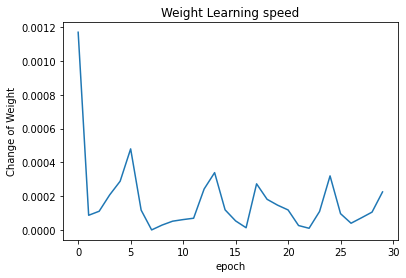

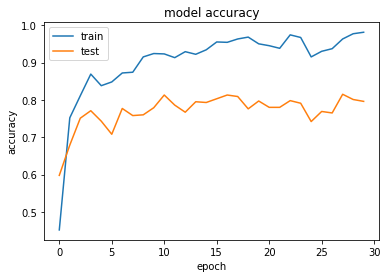

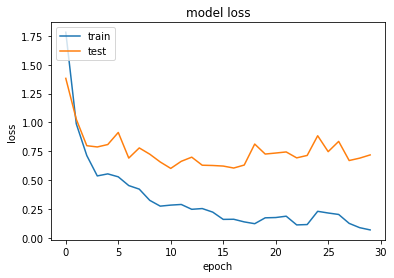

In [112]:
# Model Init
model = Sequential([
  Flatten(input_shape=[784,]),
  Dense(30, activation='sigmoid'),
  Dense(10, activation='softmax'),
])


# Model compile
model.compile(
  optimizer=tf.keras.optimizers.Adam(0.01),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Callback to get weights after each epoch
weights_dict = {}
weight_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

# Train model
history = model.fit(
  train_images,
  train_labels,
  epochs=30,
  batch_size=10,
  shuffle=True,
  steps_per_epoch=1000//10, 
  validation_data= test_set, 
  validation_steps=1000//10,
  callbacks=weight_callback
)


# Calculating Weight Learning speed
gd = []
os = 0
for epoch,weights in weights_dict.items():
    sum = 0
    nu = 0
    for i in weights:
      sum += np.sum(i)
      nu += len(i)
    sum_c = sum
    sum = (abs(sum - os)/(abs(sum) if os==0 else abs(os)))/nu
    os = sum_c
    gd.append(sum)

 
# Plot Weight Learning speed
plt.plot(gd)
plt.title('Weight Learning speed')
plt.ylabel('Change of Weight')
plt.xlabel('epoch')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Regularized 1-layer NN Model

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 42.2222 - accuracy: 0.0918 - val_loss: 2.4252 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 2.4224 - accuracy: 0.0956 - val_loss: 2.3879 - val_accuracy: 0.1840
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 2.4219 - accuracy: 0.1197 - val_loss: 2.4380 - val_accuracy: 0.1750
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 2.4433 - accuracy: 0.0788 - val_loss: 2.4718 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 2.4584 - accuracy: 0.1262 - val_loss: 2.5139 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 2.4934 - accuracy: 0.1302 - val_loss: 2.4356 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 2.4626 - accuracy: 0.1059 - val_loss: 2.4433 - val_accuracy: 0.1000
Epoch

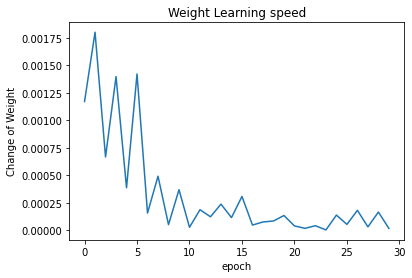

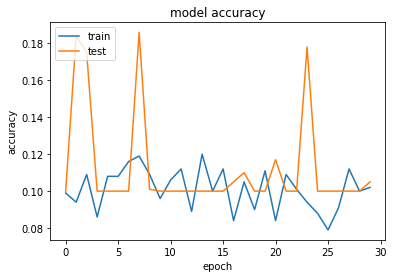

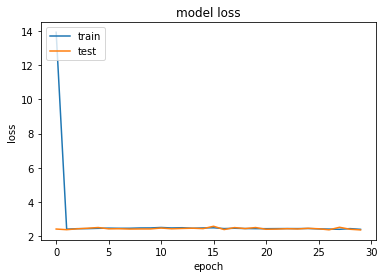

In [113]:
# Model Init
model = Sequential([
  Flatten(input_shape=[784,]),
  Dense(30, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(5)),
  Dense(10, activation='softmax'),
])

# Model compile
model.compile(
  optimizer=tf.keras.optimizers.Adam(0.01),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Callback to get weights after each epoch
weights_dict = {}
weight_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

# Train model
history = model.fit(
  train_images,
  train_labels,
  epochs=30,
  batch_size=10,
  shuffle=True,
  steps_per_epoch=1000//10, 
  validation_data= test_set, 
  validation_steps=1000//10,
  callbacks=weight_callback
)


# Calculating Weight Learning speed
gd = []
os = 0
for epoch,weights in weights_dict.items():
    sum = 0
    nu = 0
    for i in weights:
      sum += np.sum(i)
      nu += len(i)
    sum_c = sum
    sum = (abs(sum - os)/(abs(sum) if os==0 else abs(os)))/nu
    os = sum_c
    gd.append(sum)

# Plot Weight Learning speed
plt.plot(gd)
plt.title('Weight Learning speed')
plt.ylabel('Change of Weight')
plt.xlabel('epoch')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Plain 2-layer NN Model

Epoch 1/30
100/100 [==============================] - 1s 9ms/step - loss: 2.3079 - accuracy: 0.1506 - val_loss: 1.7934 - val_accuracy: 0.4150
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 1.6353 - accuracy: 0.4133 - val_loss: 1.4241 - val_accuracy: 0.4780
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 1.2311 - accuracy: 0.5703 - val_loss: 1.8412 - val_accuracy: 0.3290
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 1.1501 - accuracy: 0.5942 - val_loss: 1.2641 - val_accuracy: 0.5490
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.9025 - accuracy: 0.7253 - val_loss: 0.9952 - val_accuracy: 0.6870
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.7385 - accuracy: 0.7863 - val_loss: 0.9720 - val_accuracy: 0.6880
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.7258 - accuracy: 0.7944 - val_loss: 0.9005 - val_accuracy: 0.7270
Epoch 

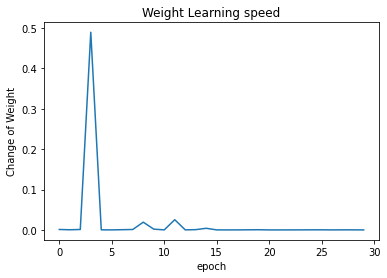

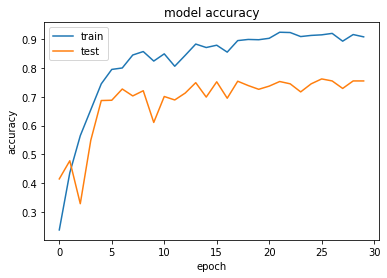

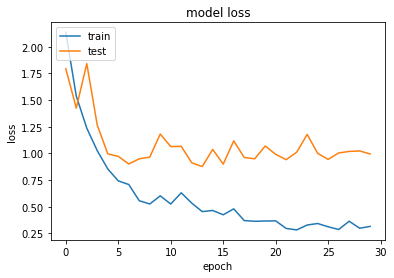

In [114]:
# Model Init
model = Sequential([
  Flatten(input_shape=[784,]),
  Dense(30, activation='sigmoid'),
  Dense(30, activation='sigmoid'),
  Dense(10, activation='softmax'),
])


# Model compile
model.compile(
  optimizer=tf.keras.optimizers.Adam(0.01),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Callback to get weights after each epoch
weights_dict = {}
weight_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

# Train model
history = model.fit(
  train_images,
  train_labels,
  epochs=30,
  batch_size=10,
  shuffle=True,
  steps_per_epoch=1000//10, 
  validation_data= test_set, 
  validation_steps=1000//10,
  callbacks=weight_callback
)


# Calculating Weight Learning speed
gd = []
os = 0
for epoch,weights in weights_dict.items():
    sum = 0
    nu = 0
    for i in weights:
      sum += np.sum(i)
      nu += len(i)
    sum_c = sum
    sum = (abs(sum - os)/(abs(sum) if os==0 else abs(os)))/nu
    os = sum_c
    gd.append(sum)
  
# Plot Weight Learning speed
plt.plot(gd)
plt.title('Weight Learning speed')
plt.ylabel('Change of Weight')
plt.xlabel('epoch')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Regularized 2-layer NN Model

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 84.9243 - accuracy: 0.1267 - val_loss: 2.3425 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3469 - accuracy: 0.1015 - val_loss: 2.3216 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3392 - accuracy: 0.0729 - val_loss: 2.3351 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3351 - accuracy: 0.0924 - val_loss: 2.3353 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3399 - accuracy: 0.0952 - val_loss: 2.3277 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3375 - accuracy: 0.0698 - val_loss: 2.3104 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3319 - accuracy: 0.0787 - val_loss: 2.3172 - val_accuracy: 0.1000
Epoch

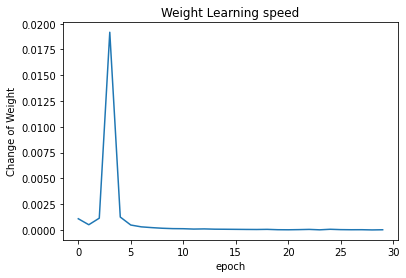

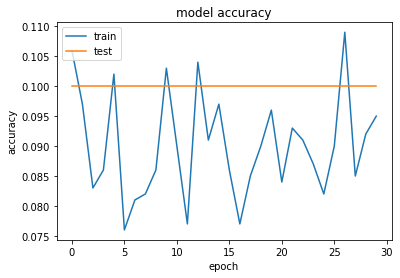

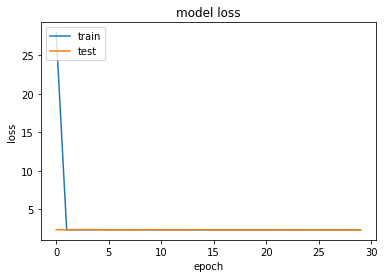

In [115]:
# Model Init
model = Sequential([
  Flatten(input_shape=[784,]),
  Dense(30, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(5)),
  Dense(30, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(5)),
  Dense(10, activation='softmax'),
])

# Model compile
model.compile(
  optimizer=tf.keras.optimizers.Adam(0.01),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Callback to get weights after each epoch
weights_dict = {}
weight_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

# Train model
history = model.fit(
  train_images,
  train_labels,
  epochs=30,
  batch_size=10,
  shuffle=True,
  steps_per_epoch=1000//10, 
  validation_data= test_set, 
  validation_steps=1000//10,
  callbacks=weight_callback
)


# Calculating Weight Learning speed
gd = []
os = 0
for epoch,weights in weights_dict.items():
    sum = 0
    nu = 0
    for i in weights:
      sum += np.sum(i)
      nu += len(i)
    sum_c = sum
    sum = (abs(sum - os)/(abs(sum) if os==0 else abs(os)))/nu
    os = sum_c
    gd.append(sum)
  
# Plot Weight Learning speed
plt.plot(gd)
plt.title('Weight Learning speed')
plt.ylabel('Change of Weight')
plt.xlabel('epoch')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Plain 3-layer NN Model

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 2.3354 - accuracy: 0.1361 - val_loss: 2.1515 - val_accuracy: 0.2300
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 1.9411 - accuracy: 0.3115 - val_loss: 1.4262 - val_accuracy: 0.4770
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 1.1919 - accuracy: 0.5846 - val_loss: 1.4648 - val_accuracy: 0.5140
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 1.0503 - accuracy: 0.6261 - val_loss: 1.2875 - val_accuracy: 0.5790
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.9416 - accuracy: 0.6853 - val_loss: 1.1877 - val_accuracy: 0.6410
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.8295 - accuracy: 0.7202 - val_loss: 1.3070 - val_accuracy: 0.5690
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.7939 - accuracy: 0.7365 - val_loss: 1.1846 - val_accuracy: 0.6720
Epoch 

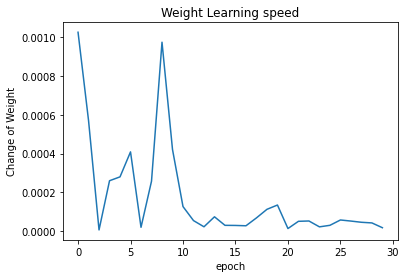

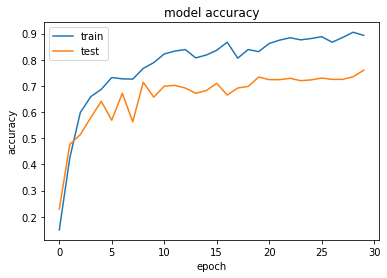

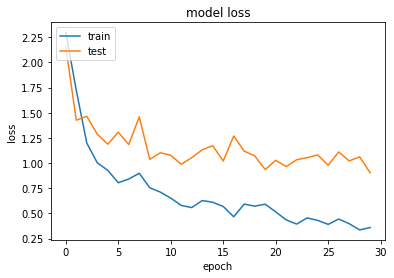

In [116]:
# Model Init
model = Sequential([
  Flatten(input_shape=[784,]),
  Dense(30, activation='sigmoid'),
  Dense(30, activation='sigmoid'),
  Dense(30, activation='sigmoid'),
  Dense(10, activation='softmax'),
])


# Model compile
model.compile(
  optimizer=tf.keras.optimizers.Adam(0.01),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Callback to get weights after each epoch
weights_dict = {}
weight_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

# Train model
history = model.fit(
  train_images,
  train_labels,
  epochs=30,
  batch_size=10,
  shuffle=True,
  steps_per_epoch=1000//10, 
  validation_data= test_set, 
  validation_steps=1000//10,
  callbacks=weight_callback
)


# Calculating Weight Learning speed
gd = []
os = 0
for epoch,weights in weights_dict.items():
    sum = 0
    nu = 0
    for i in weights:
      sum += np.sum(i)
      nu += len(i)
    sum_c = sum
    sum = (abs(sum - os)/(abs(sum) if os==0 else abs(os)))/nu
    os = sum_c
    gd.append(sum)

# Plot Weight Learning speed
plt.plot(gd)
plt.title('Weight Learning speed')
plt.ylabel('Change of Weight')
plt.xlabel('epoch')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Regularized 3-layer NN Model

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 123.1671 - accuracy: 0.1125 - val_loss: 2.3567 - val_accuracy: 0.1000
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3724 - accuracy: 0.1113 - val_loss: 2.3784 - val_accuracy: 0.1000
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3555 - accuracy: 0.0867 - val_loss: 2.3218 - val_accuracy: 0.1000
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3387 - accuracy: 0.0997 - val_loss: 2.3206 - val_accuracy: 0.1000
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3326 - accuracy: 0.1004 - val_loss: 2.3330 - val_accuracy: 0.1000
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3282 - accuracy: 0.1224 - val_loss: 2.3215 - val_accuracy: 0.1000
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 2.3369 - accuracy: 0.0891 - val_loss: 2.3222 - val_accuracy: 0.1000
Epoc

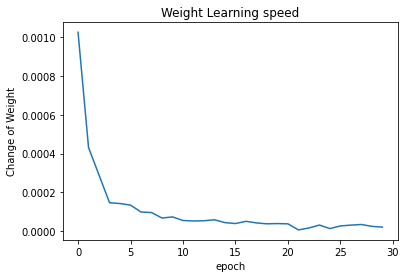

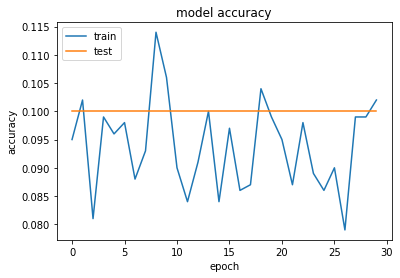

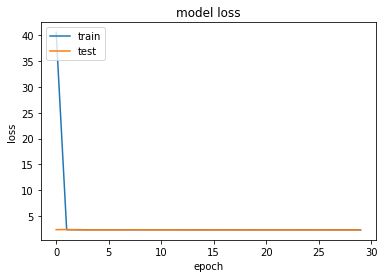

In [117]:
# Model Init
model = Sequential([
  Flatten(input_shape=[784,]),
  Dense(30, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(5)),
  Dense(30, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(5)),
  Dense(30, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(5)),
  Dense(10, activation='softmax'),
])

# Model compile
model.compile(
  optimizer=tf.keras.optimizers.Adam(0.01),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Callback to get weights after each epoch
weights_dict = {}
weight_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

# Train model
history = model.fit(
  train_images,
  train_labels,
  epochs=30,
  batch_size=10,
  shuffle=True,
  steps_per_epoch=1000//10, 
  validation_data= test_set, 
  validation_steps=1000//10,
  callbacks=weight_callback
)


# Calculating Weight Learning speed
gd = []
os = 0
for epoch,weights in weights_dict.items():
    sum = 0
    nu = 0
    for i in weights:
      sum += np.sum(i)
      nu += len(i)
    sum_c = sum
    sum = (abs(sum - os)/(abs(sum) if os==0 else abs(os)))/nu
    os = sum_c
    gd.append(sum)
  

# Plot Weight Learning speed
plt.plot(gd)
plt.title('Weight Learning speed')
plt.ylabel('Change of Weight')
plt.xlabel('epoch')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Task-2 [2.c]

## Plain CNN-Model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 5s 48ms/step - loss: 1.3091 - accuracy: 0.5586 - val_loss: 0.5470 - val_accuracy: 0.8220
Epoch 2/30
100/100 [==============================] - 5s 46ms/step - loss: 0.2510 - accuracy: 0.9222 - val_loss: 0.3917 - val_accuracy: 0.8740
Epoch 3/30
100/100 [==============================] - 5s 46ms/step - loss: 0.0624 - accuracy: 0.9818 - val_loss: 0.5343 - val_accuracy: 0.8580
Epoch 4/30
100/100 [==============================] - 5s 46ms/step - loss: 0.0552 - accuracy: 0.9871 - val_loss: 0.2966 - val_accuracy: 0.9090
Epoch 5/30
100/100 [==============================] - 5s 45ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3061 - val_accuracy: 0.9130
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3156 - val_accuracy: 0.9160
Epoch 7/30
100/100 [==============================] - 5s 46ms/step - loss: 6.3359e-04 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.

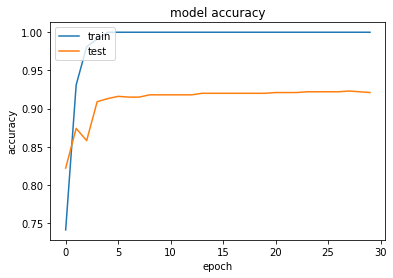

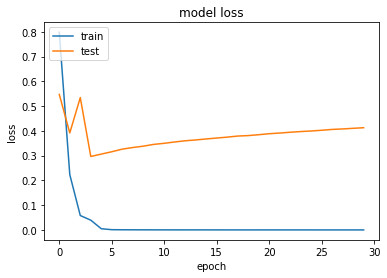

In [118]:
# Model init
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

# Model compile
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = cnn.fit_generator(training_set,
                        steps_per_epoch=1000//10, 
                         validation_data= test_set, 
                         validation_steps=1000//10, 
                         epochs=30)

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [122]:
# Accuracy & Loss on Test Data
eval = cnn.evaluate(test_set)
print("Accuracy on Test Data:",eval[1])
print("Loss on Test Data:",eval[0])

100/100 [==============================] - 1s 8ms/step - loss: 0.4126 - accuracy: 0.9210
Accuracy on Test Data: 0.9210000038146973
Loss on Test Data: 0.4126482307910919


## CNN-Model with Dropout (Regularization)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 5s 48ms/step - loss: 1.2896 - accuracy: 0.5893 - val_loss: 0.4478 - val_accuracy: 0.8490
Epoch 2/30
100/100 [==============================] - 5s 46ms/step - loss: 0.2424 - accuracy: 0.9250 - val_loss: 0.3663 - val_accuracy: 0.8740
Epoch 3/30
100/100 [==============================] - 5s 45ms/step - loss: 0.0664 - accuracy: 0.9894 - val_loss: 0.3700 - val_accuracy: 0.8730
Epoch 4/30
100/100 [==============================] - 5s 46ms/step - loss: 0.0309 - accuracy: 0.9937 - val_loss: 0.2828 - val_accuracy: 0.9230
Epoch 5/30
100/100 [==============================] - 5s 46ms/step - loss: 0.0090 - accuracy: 0.9992 - val_loss: 0.2648 - val_accuracy: 0.9300
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.3681 - val_accuracy: 0.9130
Epoch 7/30
100/100 [==============================] - 5s 46ms/step - loss: 0.0107 - accuracy: 0.9983 - val_loss: 0.3037 - val_accuracy: 0.9200

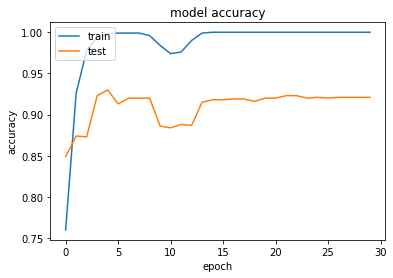

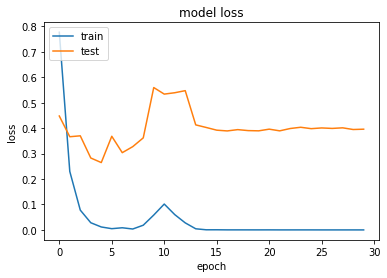

In [123]:
# Model init
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

# Model compile
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = cnn.fit_generator(training_set,
                        steps_per_epoch=1000//10, 
                         validation_data= test_set, 
                         validation_steps=1000//10, 
                         epochs=30)

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [124]:
# Accuracy & Loss on Test Data
eval = cnn.evaluate(test_set)
print("Accuracy on Test Data:",eval[1])
print("Loss on Test Data:",eval[0])

100/100 [==============================] - 1s 8ms/step - loss: 0.3960 - accuracy: 0.9210
Accuracy on Test Data: 0.9210000038146973
Loss on Test Data: 0.39601367712020874


## CNN-Model with Augmented Data (Regularization)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 6s 52ms/step - loss: 1.7782 - accuracy: 0.3748 - val_loss: 0.9404 - val_accuracy: 0.6920
Epoch 2/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6229 - accuracy: 0.8143 - val_loss: 0.4736 - val_accuracy: 0.8530
Epoch 3/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4017 - accuracy: 0.8852 - val_loss: 0.4721 - val_accuracy: 0.8470
Epoch 4/30
100/100 [==============================] - 5s 50ms/step - loss: 0.2209 - accuracy: 0.9396 - val_loss: 0.3841 - val_accuracy: 0.8740
Epoch 5/30
100/100 [==============================] - 5s 50ms/step - loss: 0.2455 - accuracy: 0.9193 - val_loss: 0.3492 - val_accuracy: 0.8810
Epoch 6/30
100/100 [==============================] - 5s 50ms/step - loss: 0.2133 - accuracy: 0.9404 - val_loss: 0.2868 - val_accuracy: 0.9060
Epoch 7/30
100/100 [==============================] - 5s 50ms/step - loss: 0.1323 - accuracy: 0.9592 - val_loss: 0.2896 - val_accuracy: 0.9100

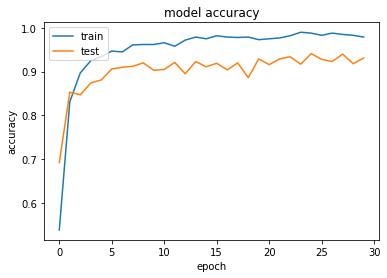

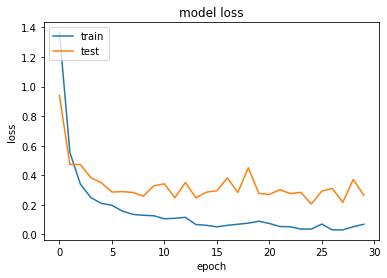

In [125]:
# Data Generator pipeline (! With Augmentation values for Q.2.c i.e. Augmented data-set)
train_gen = ImageDataGenerator(rotation_range=3, 
                               width_shift_range=0.1, 
                               
                               height_shift_range=0.1)
test_gen = ImageDataGenerator()

training_set= train_gen.flow(train_images, train_labels, batch_size=10)
test_set= train_gen.flow(test_images, test_labels, batch_size=10)

# Model init
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3,3)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

# Model compile
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = cnn.fit_generator(training_set, 
                         steps_per_epoch=1000//10, 
                         validation_data= test_set, 
                         validation_steps=1000//10, 
                         epochs=30)

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [126]:
# Accuracy & Loss on Test Data
eval = cnn.evaluate(test_set)
print("Accuracy on Test Data:",eval[1])
print("Loss on Test Data:",eval[0])

100/100 [==============================] - 1s 10ms/step - loss: 0.3259 - accuracy: 0.9250
Accuracy on Test Data: 0.925000011920929
Loss on Test Data: 0.32589781284332275


___